In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
data = pd.read_csv("manhattan_rents.csv")
data

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
0,1545,2550.0,0.0,1,480.0,9,2.0,17
1,2472,11500.0,2.0,2,2000.0,4,1.0,96
2,2919,4500.0,1.0,1,916.0,2,51.0,29
3,2790,4795.0,1.0,1,975.0,3,8.0,31
4,3946,17500.0,2.0,2,4800.0,3,4.0,136
...,...,...,...,...,...,...,...,...
3534,7582,4210.0,1.0,1,532.0,3,8.0,16
3535,5686,6675.0,2.0,2,988.0,5,10.0,9
3536,9679,1699.0,0.0,1,250.0,2,5.0,96
3537,5188,3475.0,1.0,1,651.0,6,5.0,14


In [3]:
data.dropna(inplace=True)
data.drop(data.index[data["bedrooms"] % 1 != 0], inplace=True)
data.drop(data.index[data["bathrooms"] % 1 != 0], inplace=True)
data.drop(data.index[data["floor"] % 1 != 0], inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3492 entries, 0 to 3538
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3492 non-null   int64  
 1   rent              3492 non-null   float64
 2   bedrooms          3492 non-null   float64
 3   bathrooms         3492 non-null   int64  
 4   size_sqft         3492 non-null   float64
 5   min_to_subway     3492 non-null   int64  
 6   floor             3492 non-null   float64
 7   building_age_yrs  3492 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 245.5 KB


In [5]:
data_normalized = data.copy()

# rent_min, rent_max = data["rent"].min(), data["rent"].max()
bedrooms_min, bedrooms_max = data["bedrooms"].min(), data["bedrooms"].max()
bathrooms_min, bathrooms_max = data["bathrooms"].min(), data["bathrooms"].max()

normalize = lambda actual, minimum, maximum : (actual - minimum) / (maximum - minimum)

for i, row in data.iterrows():
    data_normalized.at[i, "rent"] = normalize(row["rent"], data["rent"].min(), data["rent"].max())
    data_normalized.at[i, "bedrooms"] = normalize(row["bedrooms"], data["bedrooms"].min(), data["bedrooms"].max())
    data_normalized.at[i, "bathrooms"] = normalize(row["bathrooms"], data["bathrooms"].min(), data["bathrooms"].max())
    data_normalized.at[i, "size_sqft"] = normalize(row["size_sqft"], data["size_sqft"].min(), data["size_sqft"].max())
    data_normalized.at[i, "min_to_subway"] = normalize(row["min_to_subway"], data["min_to_subway"].min(), data["min_to_subway"].max())
    data_normalized.at[i, "floor"] = normalize(row["floor"], data["floor"].min(), data["floor"].max())
    data_normalized.at[i, "building_age_yrs"] = normalize(row["building_age_yrs"], data["building_age_yrs"].min(), data["building_age_yrs"].max())

data_normalized

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
0,1545,0.066845,0.0,0.2,0.050549,0.209302,0.024096,0.094444
1,2472,0.545455,0.4,0.4,0.384615,0.093023,0.012048,0.533333
2,2919,0.171123,0.2,0.2,0.146374,0.046512,0.614458,0.161111
3,2790,0.186898,0.2,0.2,0.159341,0.069767,0.096386,0.172222
4,3946,0.866310,0.4,0.4,1.000000,0.069767,0.048193,0.755556
...,...,...,...,...,...,...,...,...
3534,7582,0.155615,0.2,0.2,0.061978,0.069767,0.096386,0.088889
3535,5686,0.287433,0.4,0.4,0.162198,0.116279,0.120482,0.050000
3536,9679,0.021337,0.0,0.2,0.000000,0.046512,0.060241,0.533333
3537,5188,0.116310,0.2,0.2,0.088132,0.139535,0.060241,0.077778


<AxesSubplot: >

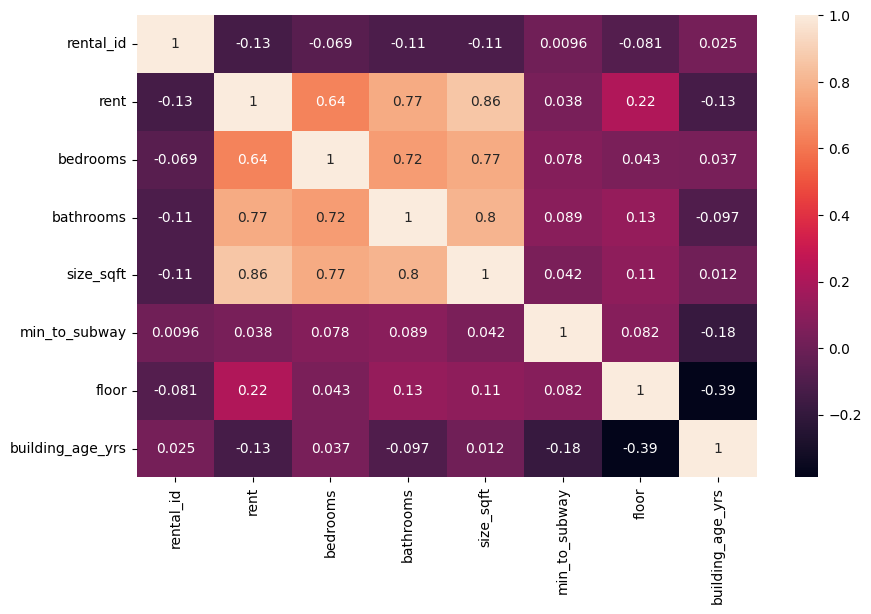

In [6]:
correlation = data_normalized.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True)

In [7]:
data_normalized_features = data_normalized.drop(columns=["rental_id", "min_to_subway", "floor", "building_age_yrs"])

split_index = int(len(data_normalized_features.index) * 0.75)
training_data, testing_data = data_normalized_features.iloc[:split_index], data_normalized_features.iloc[split_index:]

In [8]:
training_data

,rent,bedrooms,bathrooms,size_sqft
0,0.066845,0.0,0.2,0.050549
1,0.545455,0.4,0.4,0.384615
2,0.171123,0.2,0.2,0.146374
3,0.186898,0.2,0.2,0.159341
4,0.866310,0.4,0.4,1.000000
...,...,...,...,...
2651,0.187166,0.4,0.2,0.142857
2652,0.074866,0.4,0.2,0.082418
2653,0.058556,0.0,0.2,0.065934
2654,0.219251,0.2,0.2,0.103736


In [10]:
# Plane Regression
# ax + by + cz + wn + d = 0

def get_total_distance(data, model):
    total_distance = 0
    for index, row in data.iterrows():
        x = row["bedrooms"]     # Bedrooms
        y = row["bathrooms"]    # Bathrooms
        z = row["size_sqft"]    # Square feet

        a,b,c,d = model[0], model[1], model[2], model[3]

        total_distance += (abs((a * x) + (b * y + (c * z) + d))) / sqrt((a ** 2) + (b ** 2) + (c ** 2) + (d ** 2))
def decision(data, model):
    old_distance = get_total_distance(data, model)
    for i in range(50):
        


def plane_regression(data, iterations):
    # Initial Values
    possible_model = [0.5, 0.5, 0.5, 0.5]
    print("Initial Values: " + possible_model)
    # all_tested = {}

    # SLOPE_MAX = 50

    # d = initial_intercept       # Initial intercept
    # d_MAX = final_intercept     # Intercept Max

    # while d < d_MAX:
    #     a = initial_coefficients[0]
    #     while a < final_coefficients[0]:
    #         b = initial_coefficients[1]
    #         while b < final_coefficients[1]:
    #             entry_index = "d: {0}, a: {1}, b: {2}, c: {3}".format(d,a,b,c)
    #             all_tested[]
    #             b += 1
    #         a += 1
    #     d += 0.1

    # distance = 
    bestfit = {}

    SLOPE_FOUND = False
    INTERCEPT_FOUND = False
    